# **Random Forest**

**Loading Digits Dataset:**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

**Listing All Available Attributes of `digits`:**

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

**Displays the First 4 Digit Images in Grayscale:**

<Figure size 640x480 with 0 Axes>

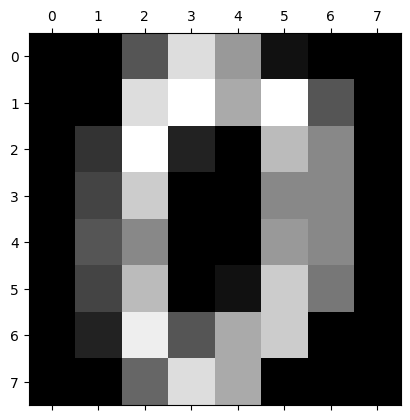

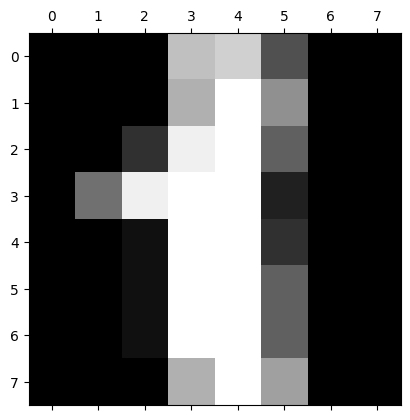

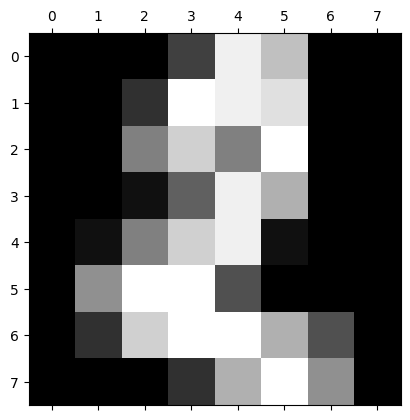

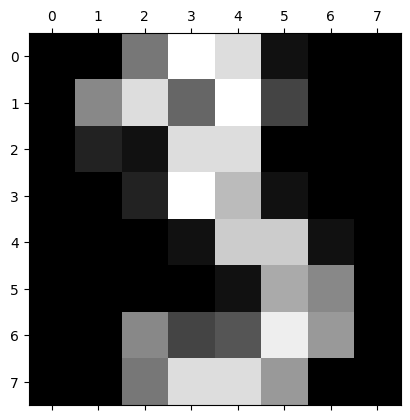

In [3]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

**Creating a DataFrame out of `digits` (each row represents *one digit*, and columns are *pixel values* (*features*)):**

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**Adding the `target` Column to `df`, Which Represents the Digit (0-9) for Each Image:**

In [5]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**Splitting Data into Features (`X`) and Labels (`y`):**

In [6]:
X = df.drop(['target'], axis='columns')
y = df.target

**Splitting Data into Training and Testing Sets:**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Training a Random Forest Classifier (a Random Forest classifier with 40 decision trees (`n_estimators=40)`):**

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

**Evaluate the Model**

In [9]:
model.score(X_test, y_test)

0.9722222222222222

**Predicting digit labels for `X_test`:**

In [10]:
y_predicted = model.predict(X_test)
y_predicted

array([3, 3, 6, 3, 0, 5, 0, 1, 9, 2, 1, 4, 0, 7, 4, 0, 7, 7, 3, 9, 2, 3,
       6, 0, 5, 8, 4, 6, 4, 8, 8, 0, 1, 0, 0, 3, 1, 5, 2, 1, 7, 3, 6, 5,
       3, 3, 1, 0, 9, 9, 3, 0, 9, 7, 3, 3, 0, 8, 5, 2, 6, 1, 3, 2, 6, 5,
       8, 1, 1, 3, 6, 9, 8, 5, 3, 9, 2, 7, 4, 7, 1, 6, 3, 9, 3, 6, 7, 5,
       0, 4, 9, 8, 1, 9, 6, 9, 7, 9, 1, 2, 9, 5, 2, 0, 5, 0, 6, 2, 3, 6,
       2, 7, 4, 2, 9, 1, 5, 2, 4, 0, 5, 6, 2, 4, 4, 0, 3, 4, 3, 6, 9, 9,
       1, 0, 7, 7, 2, 1, 6, 4, 7, 8, 5, 6, 2, 6, 1, 8, 7, 4, 7, 9, 5, 8,
       0, 3, 1, 9, 9, 0, 3, 4, 2, 9, 7, 9, 7, 2, 0, 8, 4, 4, 5, 0, 0, 4,
       5, 6, 5, 8, 1, 1, 4, 4, 8, 6, 4, 0, 5, 1, 2, 4, 2, 7, 1, 6, 4, 6,
       9, 0, 5, 8, 6, 8, 9, 0, 2, 3, 0, 9, 7, 4, 8, 0, 0, 8, 8, 0, 2, 2,
       4, 1, 4, 3, 4, 9, 5, 5, 7, 6, 8, 8, 0, 6, 4, 7, 3, 9, 7, 3, 4, 6,
       5, 5, 0, 1, 2, 4, 2, 2, 1, 2, 4, 0, 4, 5, 6, 0, 6, 8, 9, 8, 7, 3,
       1, 2, 6, 6, 1, 0, 1, 1, 4, 8, 6, 1, 8, 1, 4, 6, 1, 9, 4, 7, 5, 3,
       4, 3, 3, 7, 7, 3, 7, 8, 7, 1, 0, 1, 2, 2, 8,

**Computing Confusion Matrix:**

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 27,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  1, 29,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 34]])

**Visualizing Confusion Matrix with Heatmap:**

Text(95.72222222222221, 0.5, 'Truth')

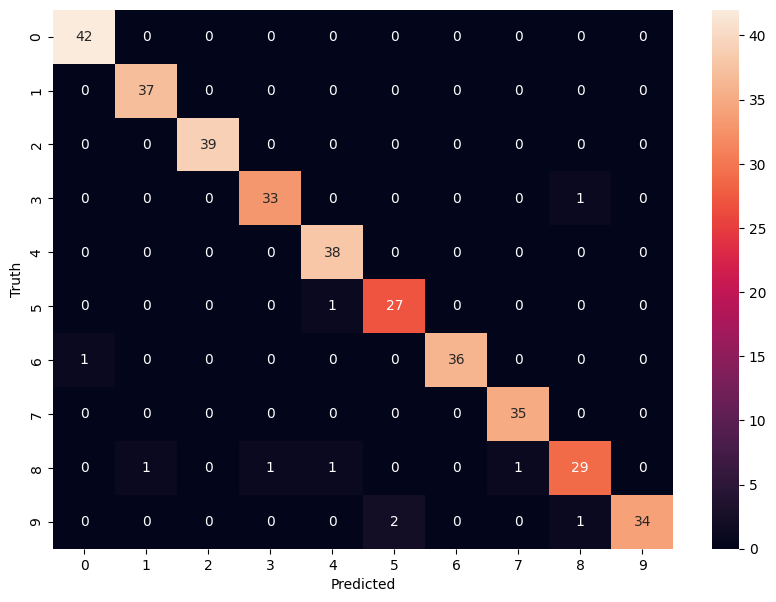

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

 A perfect model will have all values on the diagonal (top-left to bottom-right). This means all predictions were correct.

 Diagonal values (colored cells) = Correct predictions.

 Off-diagonal values (dark cells) = misclassifications.

 More values on the diagonal → Better accuracy.

More off-diagonal values → More misclassifications.